# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas 
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [ ]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

In [ ]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [ ]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

This lets us look at which classes do better:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [ ]:
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
#lucem_illud_2020.evaluateClassifier(clf, dfTest)
print(pandas.DataFrame(lucem_illud_2020.evaluateClassifier(clf, dfTest)))

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [16]:
# Data Generation
noise =[.15, .85, .5]

datasets=[("random", lucem_illud_2020.random()),
                 (f"andSplit: Noise = {noise[0]}", lucem_illud_2020.andSplit(noise[0])),
                 (f"xorSplot: Noise = {noise[0]}", lucem_illud_2020.xorSplit(noise[0])),
                 (f"targetSplit: Noise = {noise[0]}", lucem_illud_2020.targetSplit(noise[0])),
                 (f"multiBlobs: Noise = {noise[0]}", lucem_illud_2020.multiBlobs(noise[0])),
                 (f"andSplit: Noise = {noise[1]}", lucem_illud_2020.andSplit(noise[1])),
                 (f"xorSplot: Noise = {noise[1]}", lucem_illud_2020.xorSplit(noise[1])),
                 (f"targetSplit: Noise = {noise[1]}", lucem_illud_2020.targetSplit(noise[1])),
                 (f"multiBlobs: Noise = {noise[1]}", lucem_illud_2020.multiBlobs(noise[1])),
                 (f"xorSplot: Noise = {noise[2]}", lucem_illud_2020.xorSplit(noise[2]))]
           
# Classification
clfs = {'bayes': sklearn.naive_bayes.GaussianNB(),
             'svm_1': sklearn.svm.SVC(kernel='linear', probability=False),
             'svm_2': sklearn.svm.SVC(kernel='poly', degree=3, probability=False),
             'knn': sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
             'reg': sklearn.linear_model.LogisticRegression(),
             'deci_tree': sklearn.tree.DecisionTreeClassifier(),
             'random_forest': sklearn.ensemble.RandomForestClassifier(),
             'neu_net': sklearn.neural_network.MLPClassifier(),
             'gradient_boost': sklearn.ensemble.GradientBoostingClassifier()}

bayes
random


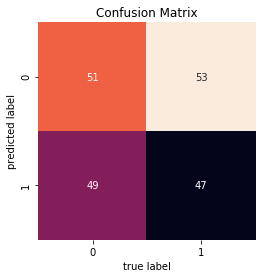

svm_1
random


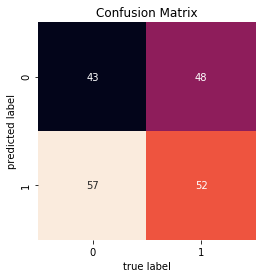

svm_2
random


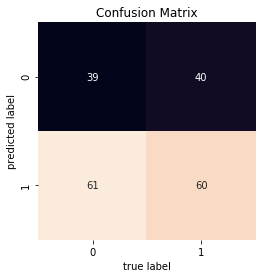

knn
random


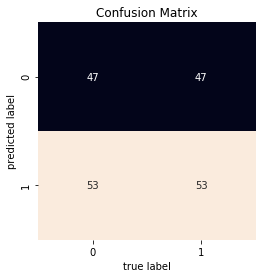

reg
random


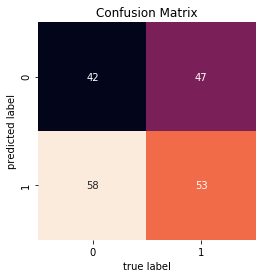

deci_tree
random


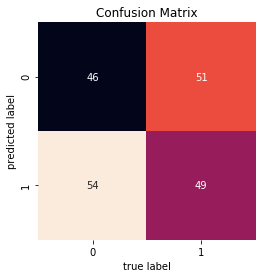

random_forest
random


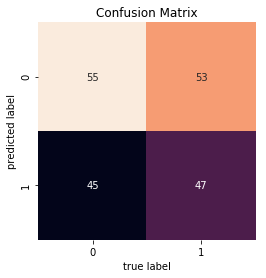

neu_net
random


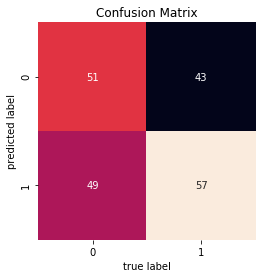

gradient_boost
random


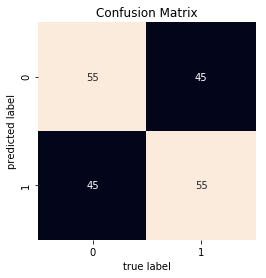

bayes
andSplit: Noise = 0.15


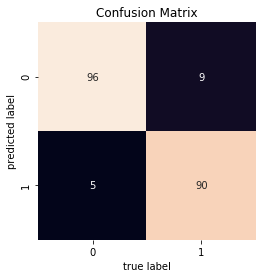

svm_1
andSplit: Noise = 0.15


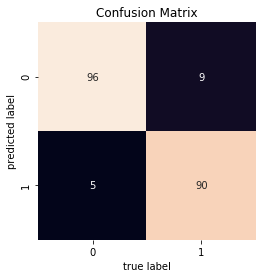

svm_2
andSplit: Noise = 0.15


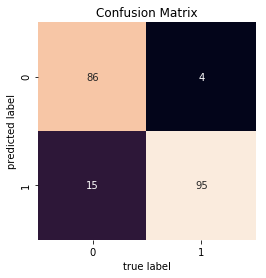

knn
andSplit: Noise = 0.15


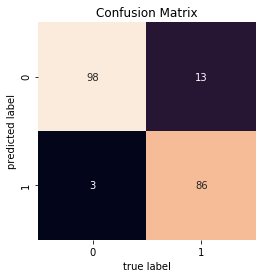

reg
andSplit: Noise = 0.15


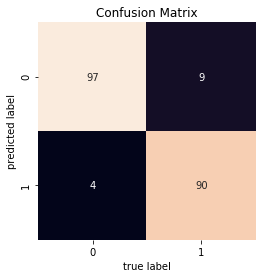

deci_tree
andSplit: Noise = 0.15


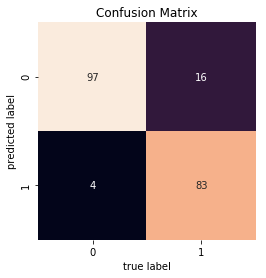

random_forest
andSplit: Noise = 0.15


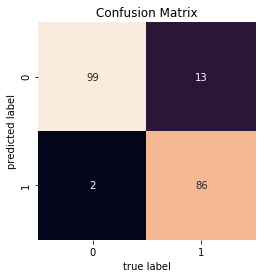

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neu_net
andSplit: Noise = 0.15


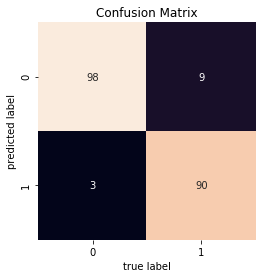

gradient_boost
andSplit: Noise = 0.15


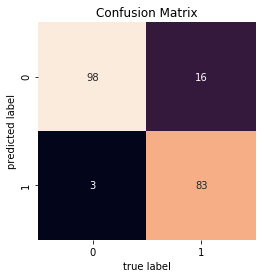

bayes
xorSplot: Noise = 0.15


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


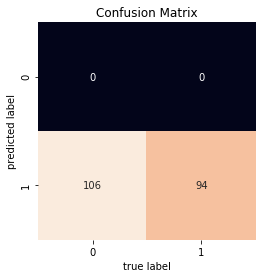

svm_1
xorSplot: Noise = 0.15


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


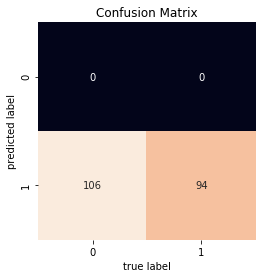

svm_2
xorSplot: Noise = 0.15


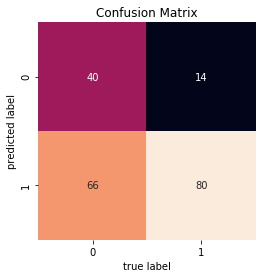

knn
xorSplot: Noise = 0.15


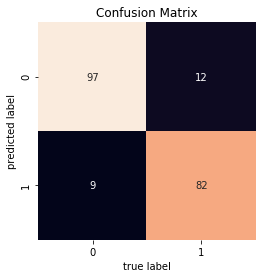

reg
xorSplot: Noise = 0.15


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


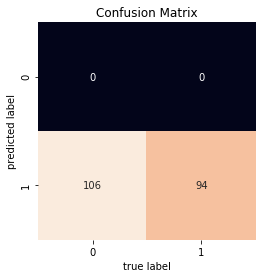

deci_tree
xorSplot: Noise = 0.15


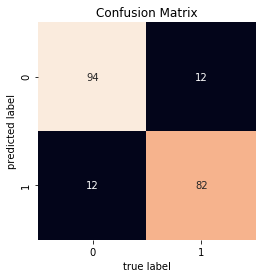

random_forest
xorSplot: Noise = 0.15


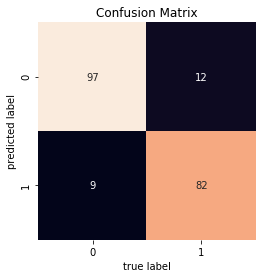

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neu_net
xorSplot: Noise = 0.15


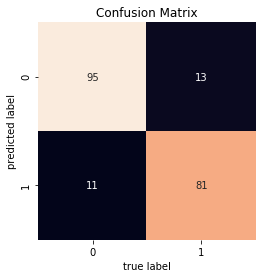

gradient_boost
xorSplot: Noise = 0.15


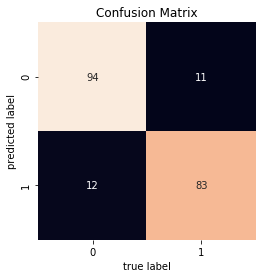

bayes
targetSplit: Noise = 0.15


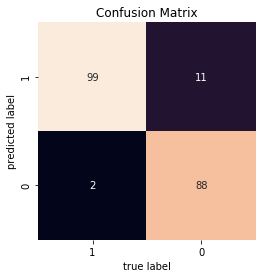

svm_1
targetSplit: Noise = 0.15


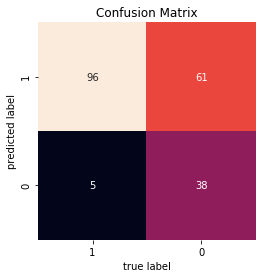

svm_2
targetSplit: Noise = 0.15


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


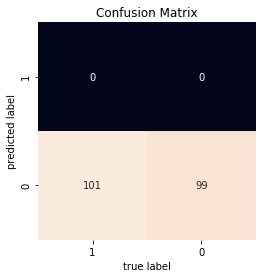

knn
targetSplit: Noise = 0.15


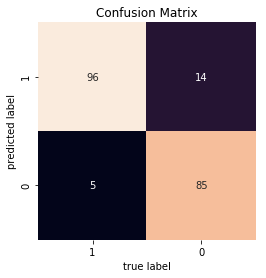

reg
targetSplit: Noise = 0.15


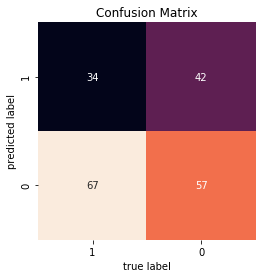

deci_tree
targetSplit: Noise = 0.15


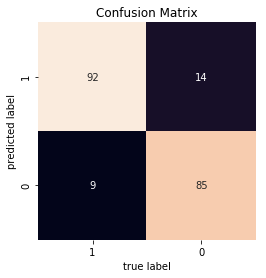

random_forest
targetSplit: Noise = 0.15


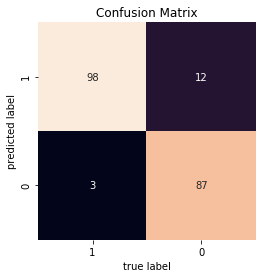

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neu_net
targetSplit: Noise = 0.15


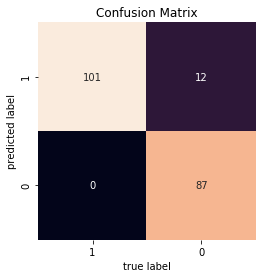

gradient_boost
targetSplit: Noise = 0.15


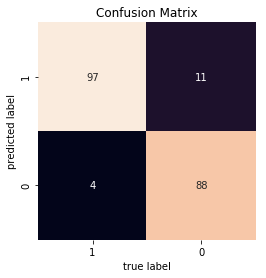

bayes
multiBlobs: Noise = 0.15


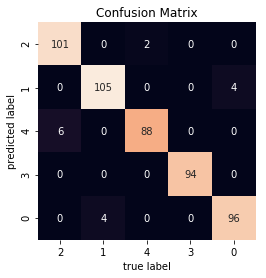

svm_1
multiBlobs: Noise = 0.15


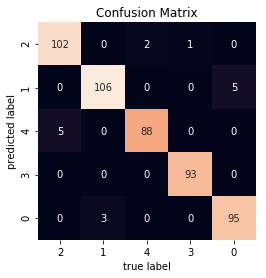

svm_2
multiBlobs: Noise = 0.15


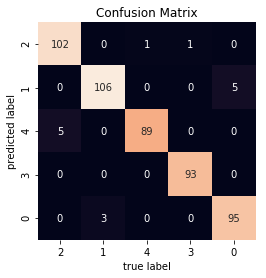

knn
multiBlobs: Noise = 0.15


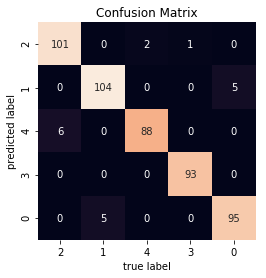

reg
multiBlobs: Noise = 0.15


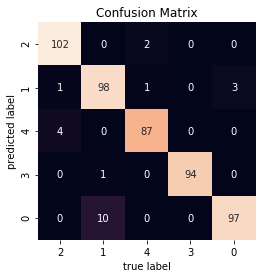

deci_tree
multiBlobs: Noise = 0.15


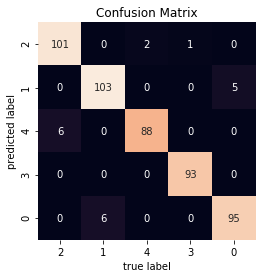

random_forest
multiBlobs: Noise = 0.15


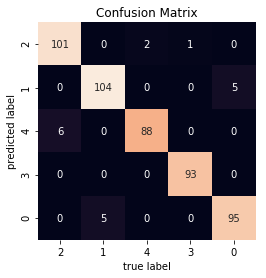

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neu_net
multiBlobs: Noise = 0.15


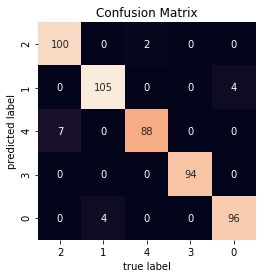

gradient_boost
multiBlobs: Noise = 0.15


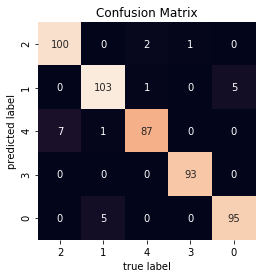

bayes
andSplit: Noise = 0.85


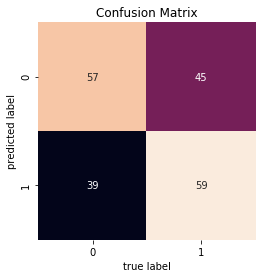

svm_1
andSplit: Noise = 0.85


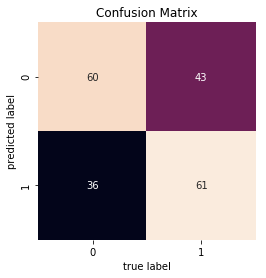

svm_2
andSplit: Noise = 0.85


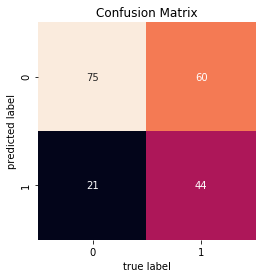

knn
andSplit: Noise = 0.85


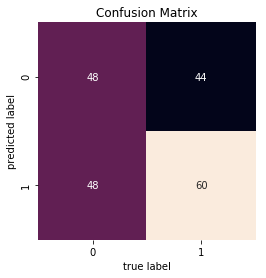

reg
andSplit: Noise = 0.85


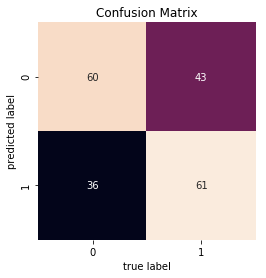

deci_tree
andSplit: Noise = 0.85


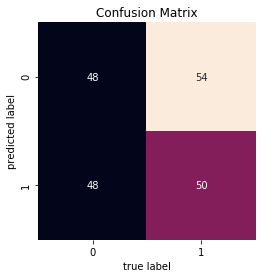

random_forest
andSplit: Noise = 0.85


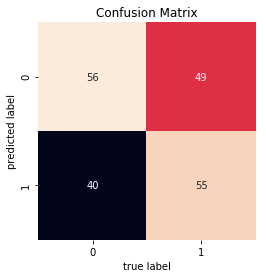

neu_net
andSplit: Noise = 0.85


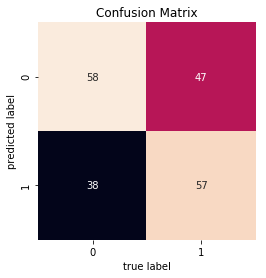

gradient_boost
andSplit: Noise = 0.85


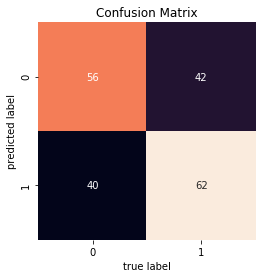

bayes
xorSplot: Noise = 0.85


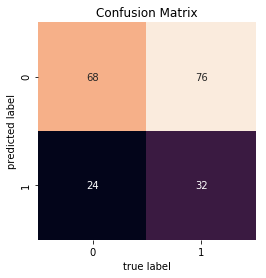

svm_1
xorSplot: Noise = 0.85


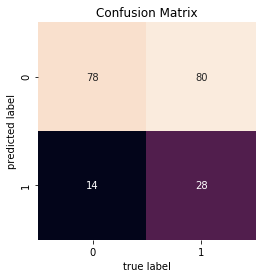

svm_2
xorSplot: Noise = 0.85


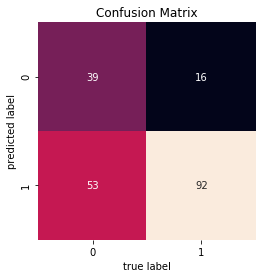

knn
xorSplot: Noise = 0.85


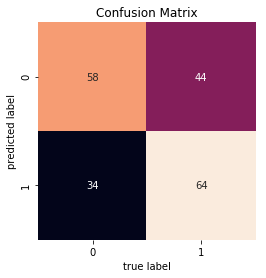

reg
xorSplot: Noise = 0.85


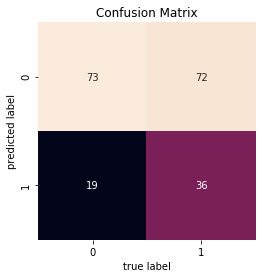

deci_tree
xorSplot: Noise = 0.85


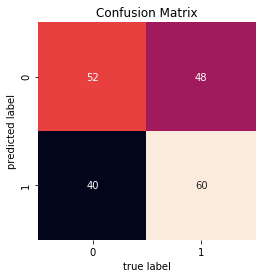

random_forest
xorSplot: Noise = 0.85


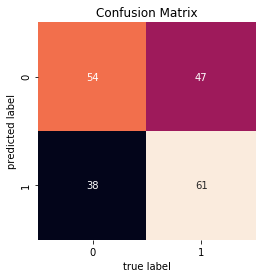

neu_net
xorSplot: Noise = 0.85


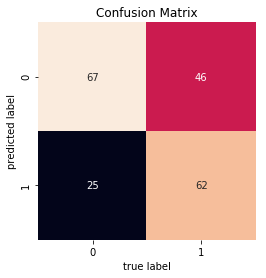

gradient_boost
xorSplot: Noise = 0.85


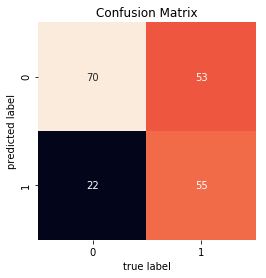

bayes
targetSplit: Noise = 0.85


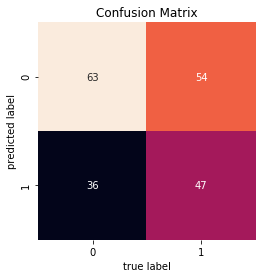

svm_1
targetSplit: Noise = 0.85


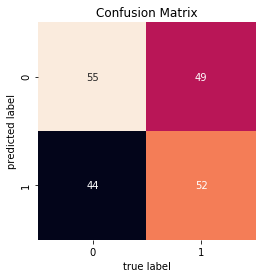

svm_2
targetSplit: Noise = 0.85


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


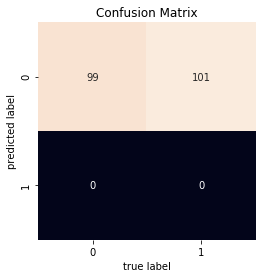

knn
targetSplit: Noise = 0.85


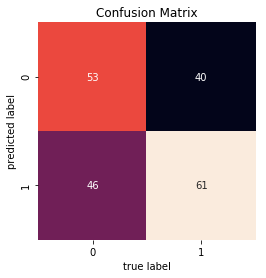

reg
targetSplit: Noise = 0.85


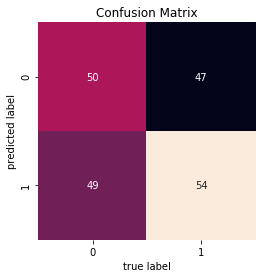

deci_tree
targetSplit: Noise = 0.85


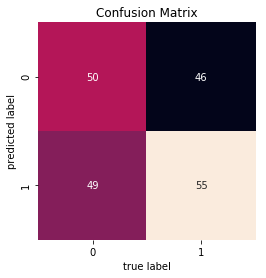

random_forest
targetSplit: Noise = 0.85


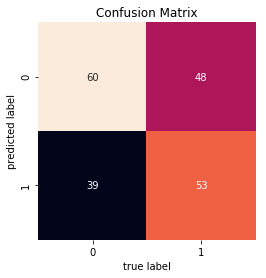

neu_net
targetSplit: Noise = 0.85


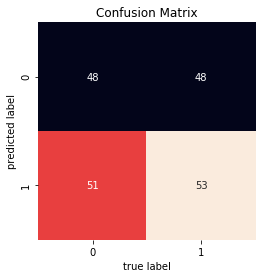

gradient_boost
targetSplit: Noise = 0.85


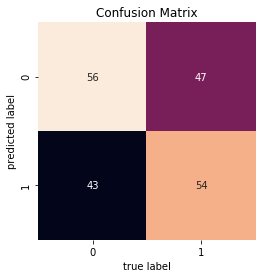

bayes
multiBlobs: Noise = 0.85


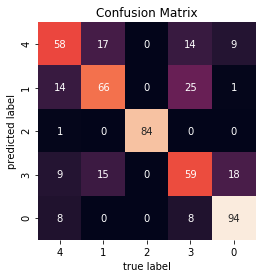

svm_1
multiBlobs: Noise = 0.85


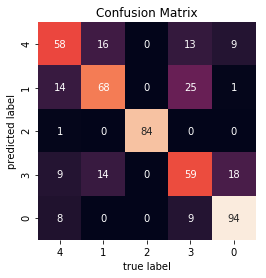

svm_2
multiBlobs: Noise = 0.85


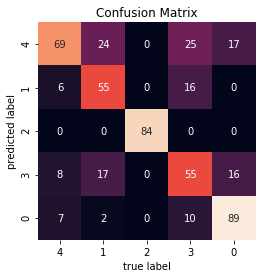

knn
multiBlobs: Noise = 0.85


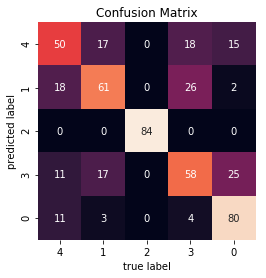

reg
multiBlobs: Noise = 0.85


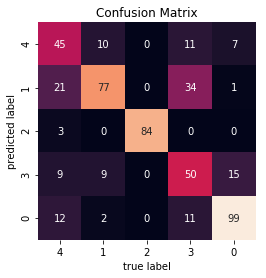

deci_tree
multiBlobs: Noise = 0.85


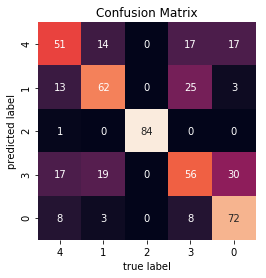

random_forest
multiBlobs: Noise = 0.85


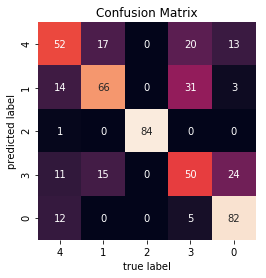

neu_net
multiBlobs: Noise = 0.85


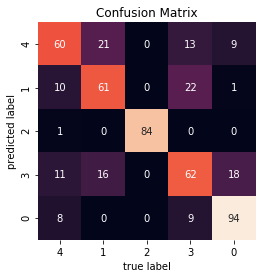

gradient_boost
multiBlobs: Noise = 0.85


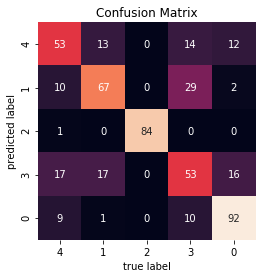

bayes
xorSplot: Noise = 0.5


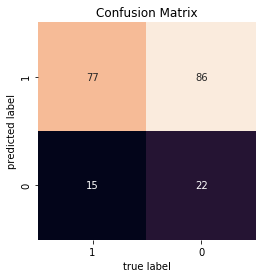

svm_1
xorSplot: Noise = 0.5


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


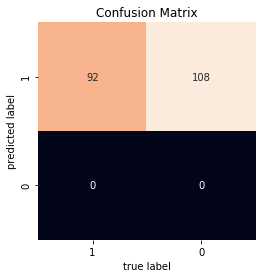

svm_2
xorSplot: Noise = 0.5


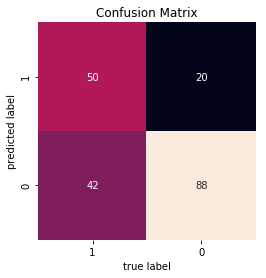

knn
xorSplot: Noise = 0.5


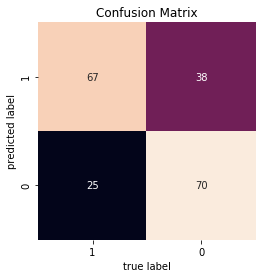

reg
xorSplot: Noise = 0.5


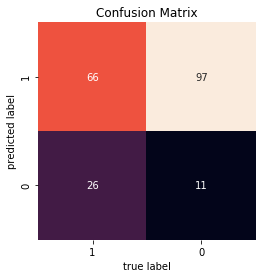

deci_tree
xorSplot: Noise = 0.5


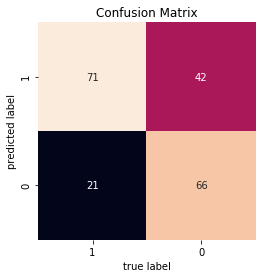

random_forest
xorSplot: Noise = 0.5


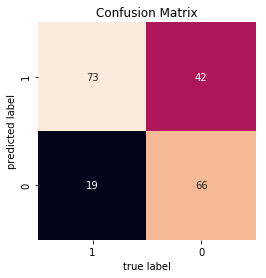

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neu_net
xorSplot: Noise = 0.5


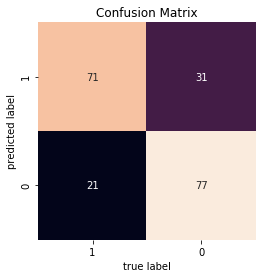

gradient_boost
xorSplot: Noise = 0.5


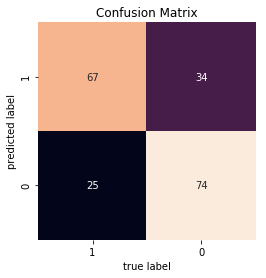

In [17]:
# confusion matrix
evaluation = []
for name, data in datasets:
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    for clf_name, clf_m in clfs.items():
        clf = clfs[clf_name]
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        print(clf_name)
        print(name)
        try: 
            eval_df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
            eval_df['clf'] = clf_name
            eval_df['data'] = name
            evaluation.append(eval_df)
        finally:
            lucem_illud_2020.plotConfusionMatrix(clf, dfTest)       

In [18]:
# evaluate classifiers

evaluations_df = pandas.concat(evaluation)
for dataset in evaluations_df['data'].unique():
    print(dataset)
    print(evaluations_df[evaluations_df['data'] == dataset][['clf', 'Error_Rate','AUC', 'Precision','Average_Precision','Recall']])
    print()

random
                     clf  Error_Rate    AUC  Precision  Average_Precision  \
Category                                                                    
0                  bayes       0.510  0.490   0.490385           0.495096   
1                  bayes       0.510  0.490   0.489583           0.495104   
0                  svm_1       0.525  0.475   0.472527           0.488187   
1                  svm_1       0.525  0.475   0.477064           0.488073   
0                  svm_2       0.505  0.495   0.493671           0.497532   
1                  svm_2       0.505  0.495   0.495868           0.497521   
0                    knn       0.500  0.500   0.500000           0.500000   
1                    knn       0.500  0.500   0.500000           0.500000   
0                    reg       0.525  0.475   0.471910           0.488202   
1                    reg       0.525  0.475   0.477477           0.488063   
0              deci_tree       0.525  0.475   0.474227           0.48

4         0.950000  

andSplit: Noise = 0.85
                     clf  Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                       
0                  bayes       0.420  0.580529   0.558824           0.526801   
1                  bayes       0.420  0.580529   0.602041           0.566542   
0                  svm_1       0.395  0.605769   0.582524           0.544078   
1                  svm_1       0.395  0.605769   0.628866           0.583854   
0                  svm_2       0.405  0.602163   0.555556           0.539028   
1                  svm_2       0.405  0.602163   0.676923           0.586391   
0                    knn       0.460  0.538462   0.521739           0.500870   
1                    knn       0.460  0.538462   0.555556           0.540513   
0                    reg       0.395  0.605769   0.582524           0.544078   
1                    reg       0.395  0.605769   0.628866           0.58385

4         0.754098  

xorSplot: Noise = 0.5
                     clf  Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                       
0                  bayes       0.505  0.520330   0.472393           0.470372   
1                  bayes       0.505  0.520330   0.594595           0.551121   
0                  svm_1       0.540  0.500000   0.460000           0.460000   
1                  svm_1       0.540  0.500000   0.000000           0.540000   
0                  svm_2       0.310  0.679147   0.714286           0.598199   
1                  svm_2       0.310  0.679147   0.676923           0.651567   
0                    knn       0.315  0.688205   0.638095           0.589700   
1                    knn       0.315  0.688205   0.736842           0.667583   
0                    reg       0.615  0.409622   0.404908           0.420477   
1                    reg       0.615  0.409622   0.297297           0.515280

From the evaluation results above, we can see that for datasets with lower noises, the performance of classification methods is better. But the classifiers all work very poorly on the randomly distributed data and data with high noise. This is easy to understand because it's more challenging for the algorithm to clarify the data when there is more randomness. For the dataset that with lower noise and linear splited, logistic regression performs better than others. For data that is distributed nonlineraly, random forest, neural network and ensemble works better than the other models becuase they can capture more complex distribution of classes.

## Empirical Data

In [19]:
# datasets
datasets_dic={'Spam': lucem_illud_2020.loadSpam(),
                 'Senate Large': lucem_illud_2020.loadSenateLarge(),
                 'Senate Small': lucem_illud_2020.loadSenateSmall(),
                 'Reddit': lucem_illud_2020.loadReddit(),
                 'News': lucem_illud_2020.loadNewsGroups()}

Loading Spam
Loading Ham
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading senate data
Converting to vectors
Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


Spam
bayes


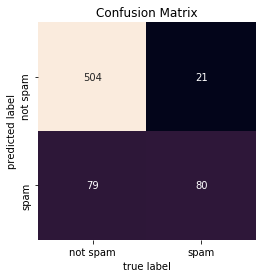

Spam
svm_1


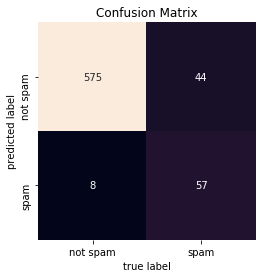

Spam
svm_2


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


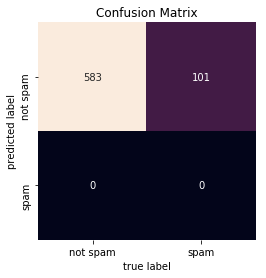

Spam
knn


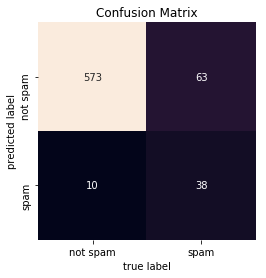

Spam
reg


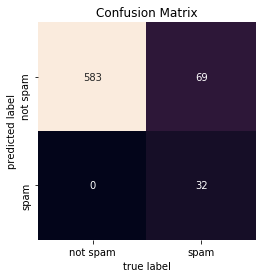

Spam
deci_tree


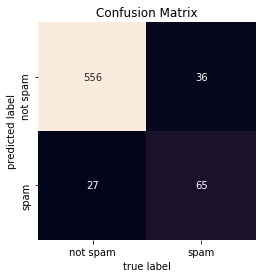

Spam
random_forest


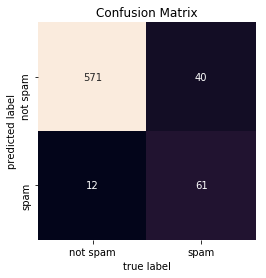

Spam
neu_net


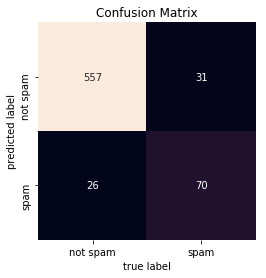

Spam
gradient_boost


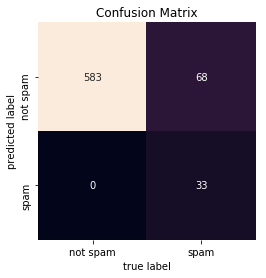

Senate Large
bayes


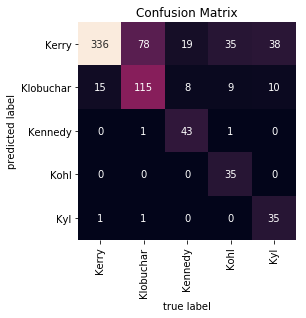

Senate Large
svm_1


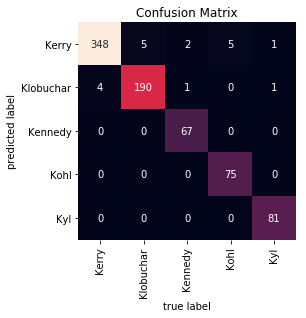

Senate Large
svm_2


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


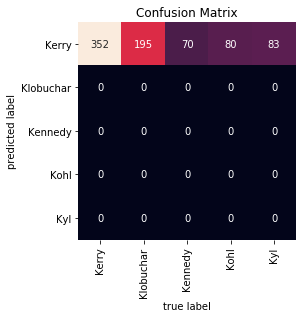

Senate Large
knn


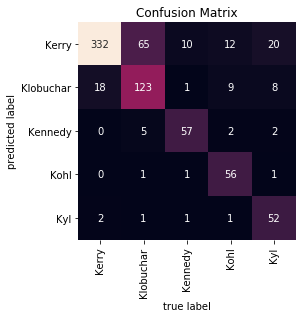

Senate Large
reg


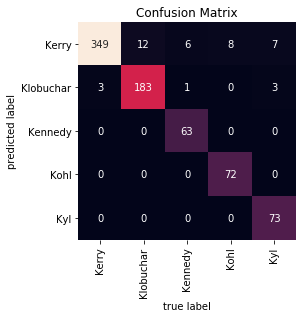

Senate Large
deci_tree


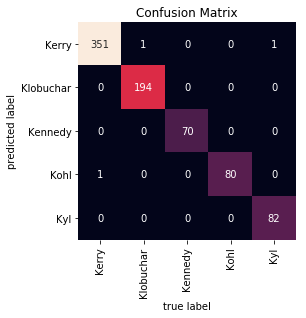

Senate Large
random_forest


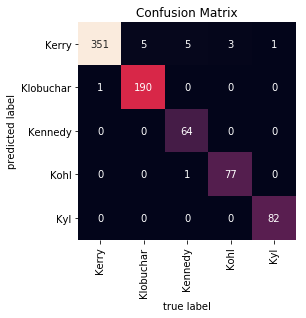

Senate Large
neu_net


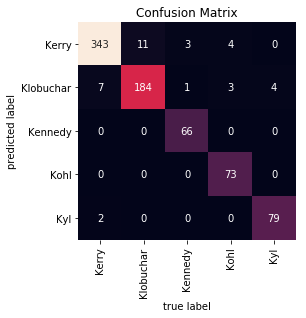

Senate Large
gradient_boost


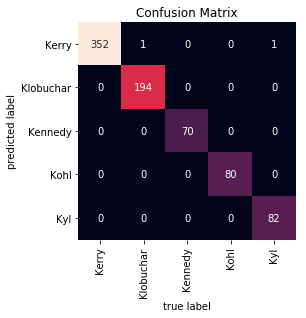

Senate Small
bayes


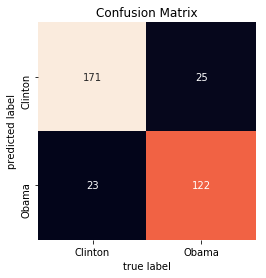

Senate Small
svm_1


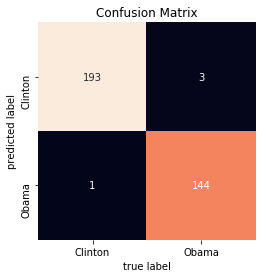

Senate Small
svm_2


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


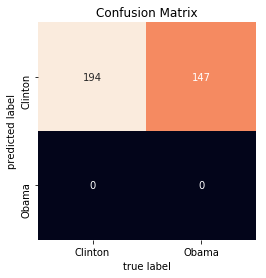

Senate Small
knn


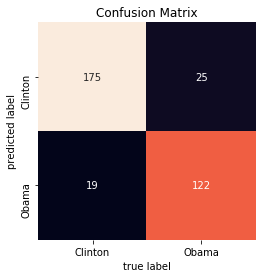

Senate Small
reg


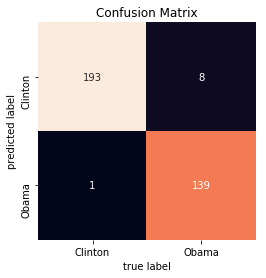

Senate Small
deci_tree


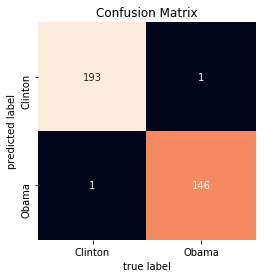

Senate Small
random_forest


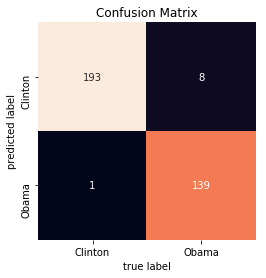

Senate Small
neu_net


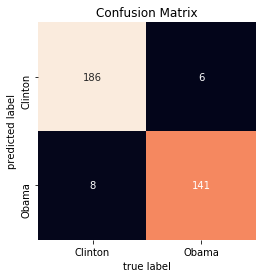

Senate Small
gradient_boost


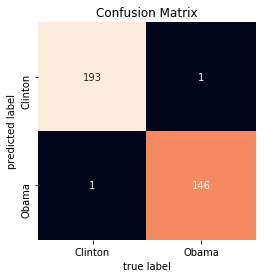

Reddit
bayes


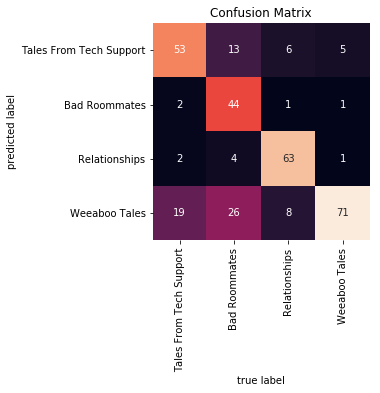

Reddit
svm_1


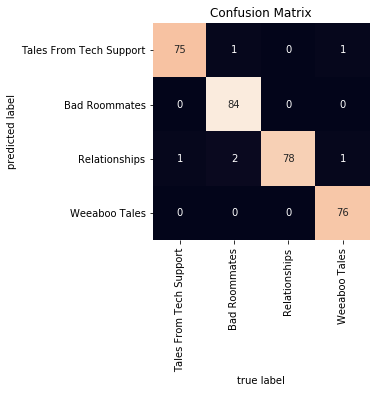

Reddit
svm_2


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


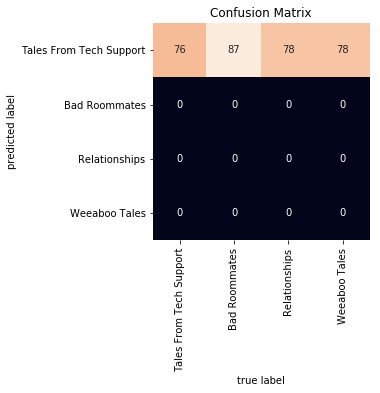

Reddit
knn


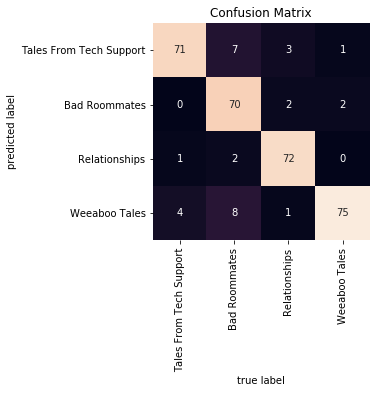

Reddit
reg


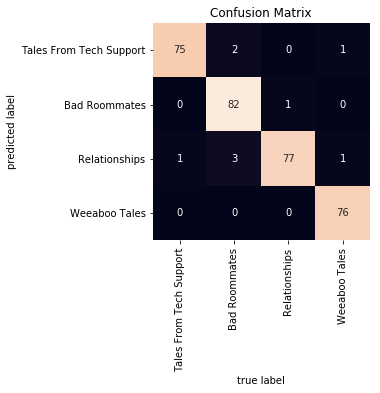

Reddit
deci_tree


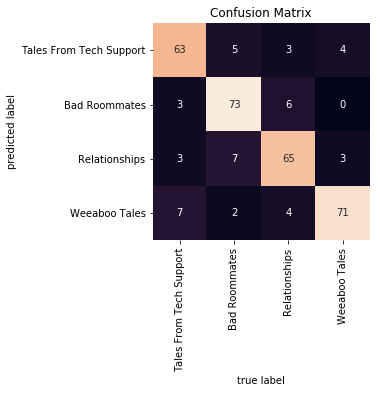

Reddit
random_forest


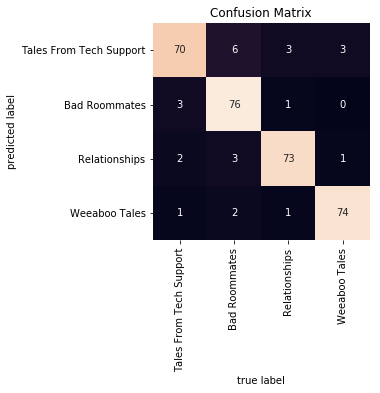

Reddit
neu_net


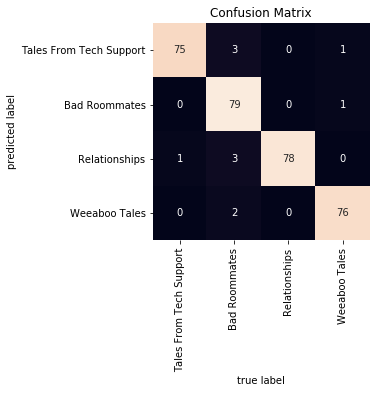

Reddit
gradient_boost


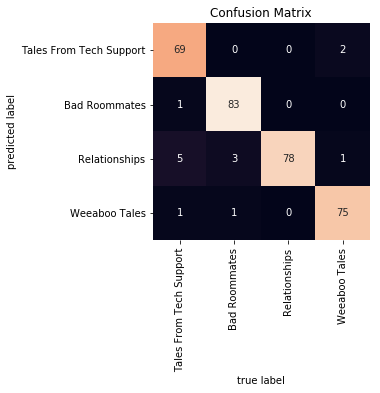

News
bayes


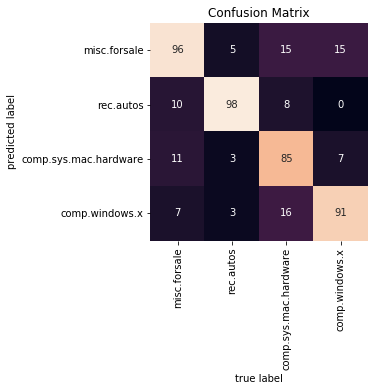

News
svm_1


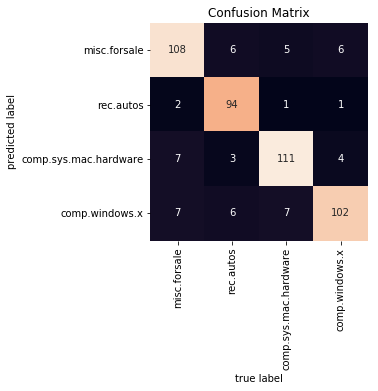

News
svm_2


C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\74068\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


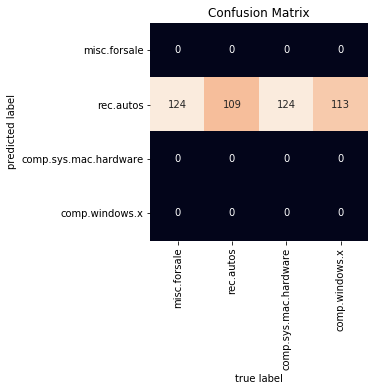

News
knn


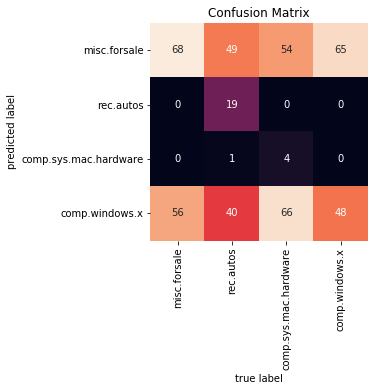

News
reg


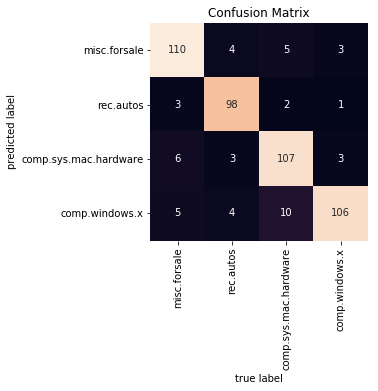

News
deci_tree


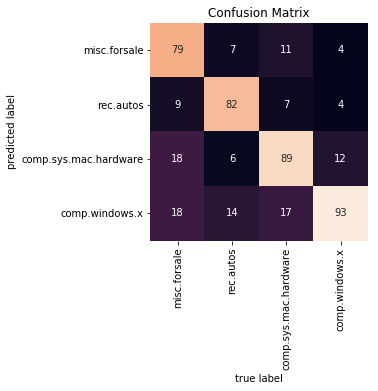

News
random_forest


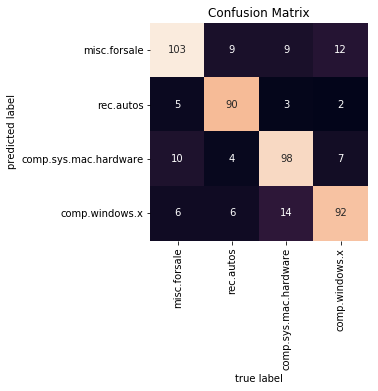

News
neu_net


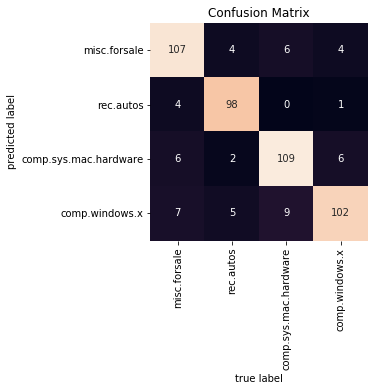

News
gradient_boost


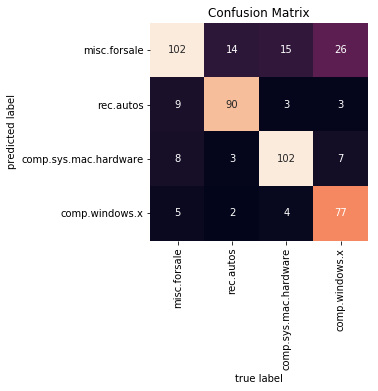

In [20]:
evaluation2=[]
for name, data in datasets_dic.items():
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    for clf_name, clf_m in clfs.items():
        clf = clfs[clf_name]
        print(name)
        print(clf_name)
        try:  
            clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
            eval_df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
            eval_df['clf'] = clf_name
            eval_df['data'] = name
            evaluation2.append(eval_df)
        finally:
            lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
    

In [21]:
# evaluate classifiers

evaluations2_df = pandas.concat(evaluation2)
for dataset in evaluations2_df['data'].unique():
    print(dataset)
    print(evaluations2_df[evaluations2_df['data'] == dataset][['clf', 'Error_Rate','AUC', 'Precision','Average_Precision','Recall']])
    print() 

Spam
                     clf  Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                       
not spam           bayes    0.146199  0.828287   0.960000           0.945411   
spam               bayes    0.146199  0.828287   0.503145           0.429232   
not spam           svm_1    0.076023  0.775317   0.928918           0.927867   
spam               svm_1    0.076023  0.775317   0.876923           0.559225   
not spam           svm_2    0.147661  0.500000   0.852339           0.852339   
spam               svm_2    0.147661  0.500000   0.000000           0.147661   
not spam             knn    0.106725  0.679542   0.900943           0.900110   
spam                 knn    0.106725  0.679542   0.791667           0.389960   
not spam             reg    0.100877  0.658416   0.894172           0.894172   
spam                 reg    0.100877  0.658416   1.000000           0.417709   
not spam       deci_tree    0.09210

Obama     0.993197  

Reddit
                                    clf  Error_Rate       AUC  Precision  \
Category                                                                   
Bad Roommates                     bayes    0.147335  0.799301   0.688312   
Tales From Tech Support           bayes    0.068966  0.889323   0.900000   
Relationships                     bayes    0.147335  0.744253   0.916667   
Weeaboo Tales                     bayes    0.188088  0.845170   0.572581   
Bad Roommates                     svm_1    0.009404  0.989306   0.974026   
Tales From Tech Support           svm_1    0.012539  0.991701   0.951220   
Relationships                     svm_1    0.009404  0.982759   1.000000   
Weeaboo Tales                     svm_1    0.006270  0.987179   1.000000   
Bad Roommates                     svm_2    0.761755  0.500000   0.238245   
Tales From Tech Support           svm_2    0.244514  0.500000   0.000000   
Relationships                     svm_2    0.272727  0.5000

comp.windows.x                  0.748158  0.825688  



SVM Linear and Logistic Regression works best for data have clusters themselves, for example, Reddit, News, Senate small. For Senate Large and Spam, which is more complicated, ensenble and random forest works better, because these algorithms are better at classifying data with more complicated structures. 

##  New method

Loading Spam
Loading Ham
Converting to vectors
Spam
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.111111  0.697049   0.775862           0.415381  0.416667
not spam    0.111111  0.697049   0.899361           0.898069  0.977431


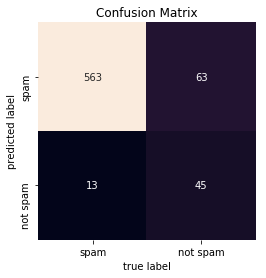

andSplit
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.38  0.622842   0.583333           0.545957  0.670213
1               0.38  0.622842   0.663043           0.606563  0.575472


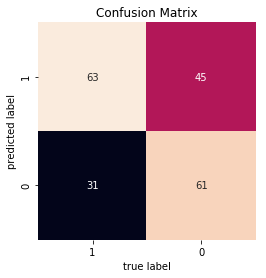

In [22]:
datasets_new={'Spam': lucem_illud_2020.loadSpam(),
              'andSplit':lucem_illud_2020.andSplit(0.8)}

# choose AdaBoost Classifier as the new method

for name, data in datasets_new.items():
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    clf=sklearn.ensemble.AdaBoostClassifier()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(name)
    print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
    lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

For the spam dataset, adaboost performs similar to regression, worse than svm_2 and bayes. For the and split with high noise dataset, we can see that adaboost doesn't perform better than naive bayes and regression, because the dataset is linearly splitted, the simpler algorithems could distingush better. 

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [23]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)
ObamaClintonReleases.head

<bound method NDFrame.head of                                            download_url  \
0     https://raw.githubusercontent.com/lintool/Grim...   
1     https://raw.githubusercontent.com/lintool/Grim...   
2     https://raw.githubusercontent.com/lintool/Grim...   
3     https://raw.githubusercontent.com/lintool/Grim...   
4     https://raw.githubusercontent.com/lintool/Grim...   
5     https://raw.githubusercontent.com/lintool/Grim...   
6     https://raw.githubusercontent.com/lintool/Grim...   
7     https://raw.githubusercontent.com/lintool/Grim...   
8     https://raw.githubusercontent.com/lintool/Grim...   
9     https://raw.githubusercontent.com/lintool/Grim...   
10    https://raw.githubusercontent.com/lintool/Grim...   
11    https://raw.githubusercontent.com/lintool/Grim...   
12    https://raw.githubusercontent.com/lintool/Grim...   
13    https://raw.githubusercontent.com/lintool/Grim...   
14    https://raw.githubusercontent.com/lintool/Grim...   
15    https://raw.githubus

Let's turn the 'targetSenator' column into a binary category variable.

In [24]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [25]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [26]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [27]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [33]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [34]:
TFVects.shape

(1368, 11441)

In [35]:
TFVects_test = TFVectorizer.fit_transform(test_data_df['text'])
TFVects_test.shape

(341, 5700)

We can save this in the dataframe to make things easier

In [36]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
logistic.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

0.9649122807017544

In [ ]:
logistic.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [38]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
reduced_data

array([[-2.31340809e-02, -3.08841901e-02, -1.18977522e-03, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21],
       [-9.22609514e-02,  3.43332587e-01,  1.05866748e-01, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21],
       [-7.82286558e-05, -4.47525955e-03, -1.03357244e-02, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21],
       ...,
       [-1.18981126e-01,  3.91363885e-01,  1.57352819e-01, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21],
       [-2.12765872e-02, -1.20479646e-02, -1.89727381e-02, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21],
       [-3.78759228e-02, -4.67679017e-02, -3.37782387e-02, ...,
         5.29774899e-20,  1.00971016e-19,  9.62139950e-21]])

We can store the PCA space vectors in the dataframe too:

In [39]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


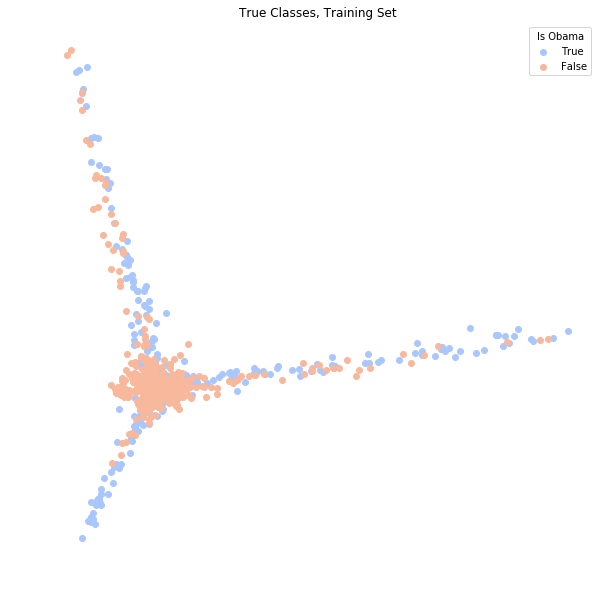

In [40]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

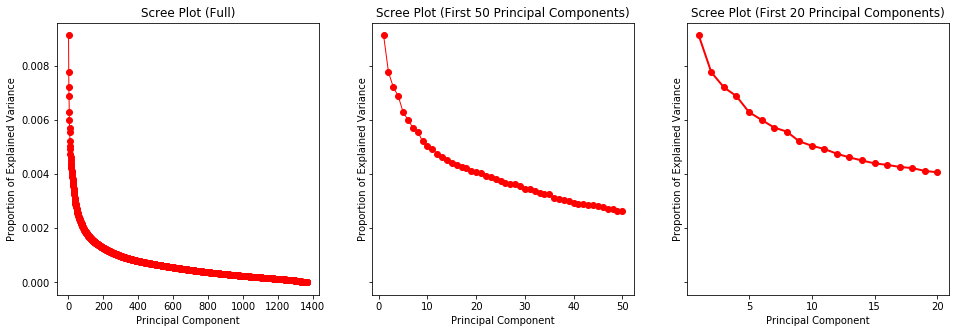

In [41]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [42]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [43]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [44]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6600877192982456

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [45]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

ValueError: operands could not be broadcast together with shapes (341,5700) (11441,) 

In [ ]:
TFVects_test.shape

Slightly poorer. How about using more dimensions (40)?

In [46]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

KeyError: 'pca'

Or still more (100)?

In [47]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

KeyError: 'pca'

Or even more (200)!

In [48]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

KeyError: 'pca'

This is becoming ridiculous (400)!

In [49]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

KeyError: 'pca'

Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [50]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9649122807017544


Train the model using training data, and then test it on the testing data.

In [51]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

ValueError: X has 5700 features per sample; expecting 11441

81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [52]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9649122807017544
Testing:


ValueError: Expected input with 11441 features, got 5700 instead

A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [ ]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [ ]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

Recall:

In [54]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

KeyError: 'nb_predict'

F1-measure:

In [55]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

KeyError: 'nb_predict'

Let's take a look at how well our posterior distribution looks relative to the truth.

KeyError: 'nb_predict_prob_true'

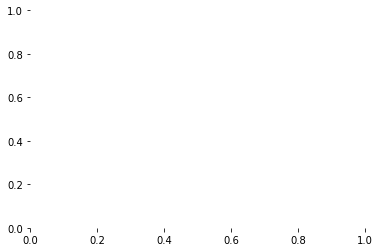

In [56]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [57]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

IndexError: list index out of range

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [58]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [59]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [60]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [61]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [62]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [63]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [64]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [65]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.9001741149158444


In [66]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
420,soc.religion.christian,soc.religion.christian
2027,comp.graphics,comp.graphics
618,soc.religion.christian,soc.religion.christian
45,talk.religion.misc,talk.religion.misc
894,soc.religion.christian,soc.religion.christian
357,talk.religion.misc,soc.religion.christian
2143,comp.graphics,comp.graphics
1418,sci.space,sci.space
1733,comp.graphics,comp.graphics
2086,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [67]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8069767441860465


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

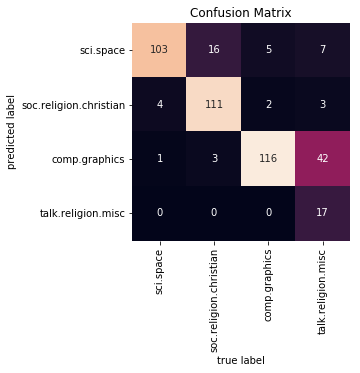

In [68]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [69]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.8938735284853562
0.8069767441860465
0.8327133682192974


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [70]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.123256,0.896626,0.716049,0.691578,0.943089
comp.graphics,0.076744,0.933374,0.786260,0.761487,0.953704
talk.religion.misc,0.120930,0.623188,1.000000,0.367307,0.246377
sci.space,0.065116,0.911923,0.925000,0.833994,0.853846


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

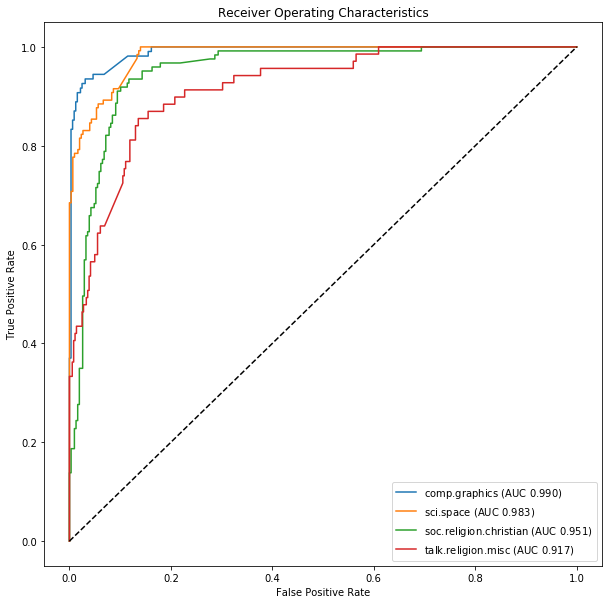

In [71]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

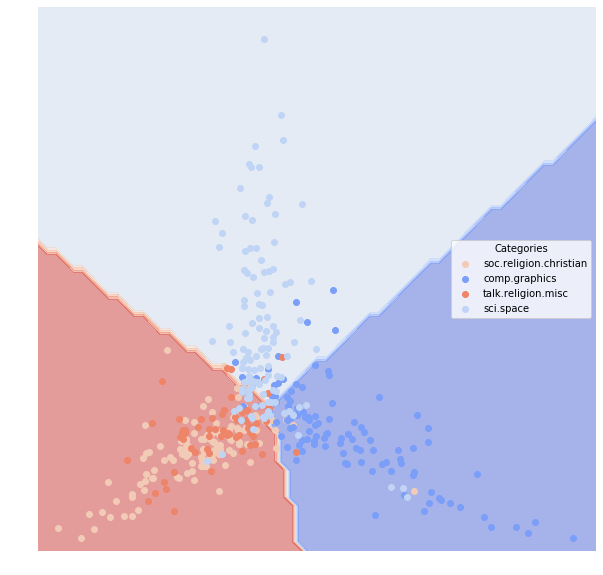

In [72]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


### Preprocessing

In [73]:
# Logistic
# Dataset: personal failure and successe events
data_raw=pandas.read_csv('C:/Users/74068/Content-Analysis-2020/data/W3_data.csv')
data_raw.head

<bound method NDFrame.head of     category                                            content
0          s  I wanted to be a grading TA for stats class. I...
1          s  I successfully caught up with all French homework
2          s  I reorganized my schedule so that I could work...
3          s  I successfully did my part in helping to run K...
4          s  I completed a six-month streak on the language...
5          s  I was able to run 11k with a good pace even th...
6          s  I submitted a complete application to be a Res...
7          s          I got a 96 on my math final last quarter.
8          s              I recieved a 92 on a subsequent test.
9          s                   I got accepted into a STEM trek.
10         s     i study for 2 years to get a associates degree
11         s                      i got a new job and i love it
12         s      I successfully showed up to work-study today.
13         s  I succeded to get a sufficent amount of readin...
14        

In [74]:
# generate binary tag
data_raw['category'] = [s == 's' for s in data_raw['category']]

# tokenize and normalize
data_raw['tokenized']=data_raw['content'].apply(lambda x:lucem_illud_2020.word_tokenize(x))
data_raw['normalized']=data_raw['content'].apply(lambda x:lucem_illud_2020.normalizeTokens(x))

# uncoded subset
data_uncoded=data_raw[181:]
data_uncoded=data_uncoded.drop(['category'], axis=1)
data_coded=data_raw[:180]

# split train and test data
holdBackFraction = .3
train_mydata_df, test_mydata_df = lucem_illud_2020.trainTestSplit(data_coded, holdBackFraction=holdBackFraction)
print("for training:")
print(len(train_mydata_df))
print("for testing:")
print(len(test_mydata_df))

for training:
126
for testing:
54


### Logistic Regression

In [75]:
# convert to tf-idf matrix
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100,
                                                                  min_df=2,
                                                                  stop_words='english',
                                                                  norm='l2')
TFVects_train=TFVectorizer.fit_transform(train_mydata_df['content'])
TFVects_test.shape

(430, 11401)

In [76]:
# store the vestors
train_mydata_df['vect']=[np.array(v).flatten() for v in TFVects_train.todense()]

# prepare test data
TFVects_test=TFVectorizer.transform(test_mydata_df['content'])
test_mydata_df['vect']=[np.array(v).flatten() for v in TFVects_test.todense()]

# use logistic regression
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_mydata_df['vect'], axis=0), train_mydata_df['category'])
print("training accuracy:",logistic.score(np.stack(train_mydata_df['vect'], axis=0), train_mydata_df['category']))
print("testing accuracy:",logistic.score(np.stack(test_mydata_df['vect'], axis=0), test_mydata_df['category']))

training accuracy: 0.9285714285714286
testing accuracy: 0.6296296296296297


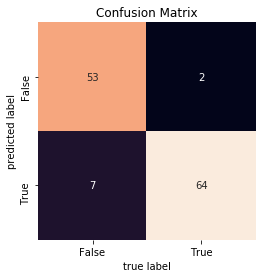

In [77]:
# Visualize the confusion matrix for the training set
lucem_illud_2020.plotConfusionMatrix(logistic, train_mydata_df)

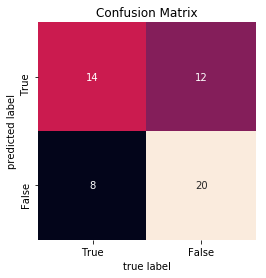

In [78]:
# Visualize the confusion matrix for the testing set
lucem_illud_2020.plotConfusionMatrix(logistic, test_mydata_df)

In [79]:
test_mydata_df['predict'] = logistic.predict(np.stack(test_mydata_df['vect'], axis=0))

# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.6426536426536426
Recall:  0.6296296296296297
F measure: 0.632716049382716
AUC: 0.6306818181818182


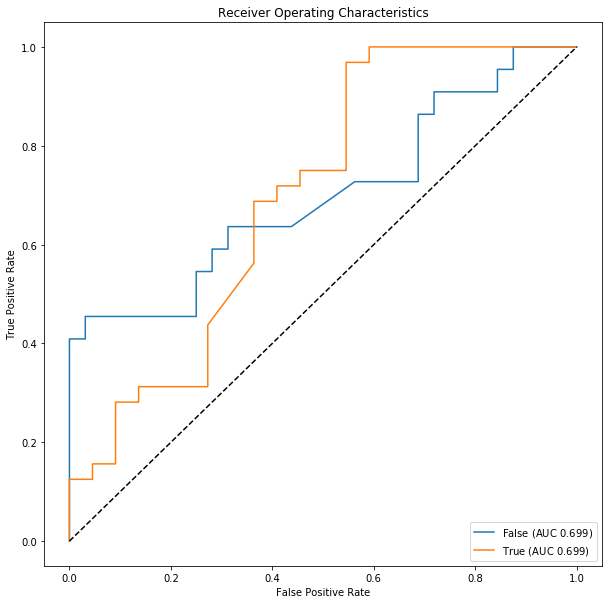

In [80]:
# perform an ROC visualization
lucem_illud_2020.plotMultiROC(logistic, test_mydata_df)

In [81]:
# Exrapolate codes from these models to all uncoded data

# turn the uncoded dataset into a tf-idf matrix, store the vectors in df
TFVects_uncoded = TFVectorizer.transform(data_uncoded['content'])
data_uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]

# store the predicted labels
data_uncoded['predict'] = logistic.predict(np.stack(data_uncoded['vect'], axis=0))
data_uncoded.head()

,content,tokenized,normalized,vect,predict
181,I slept 11 hours last night from jet lag which...,"[I, slept, 11, hours, last, night, from, jet, ...","[sleep, hour, night, jet, lag, leave, feel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
182,I have not gone to the gym enough.,"[I, have, not, gone, to, the, gym, enough]","[go, gym]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
183,I have not been able to go to Wicker Park.,"[I, have, not, been, able, to, go, to, Wicker,...","[able, wicker, park]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
184,I forgot to go to a meeting yesterday.,"[I, forgot, to, go, to, a, meeting, yesterday]","[forget, meet, yesterday]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
185,I told myself that I would do well in my class...,"[I, told, myself, that, I, would, do, well, in...","[tell, class, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


### Binary Naïve Bayes

In [84]:
# naive bayes classification
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_mydata_df['vect'], axis=0), train_mydata_df['category'])
print("training accuracy score", naiveBayes.score(np.stack(train_mydata_df['vect'], axis=0), train_mydata_df['category']))
print("testing accuracy score", naiveBayes.score(np.stack(test_mydata_df['vect'], axis=0), test_mydata_df['category']))


training accuracy score 0.9126984126984127
testing accuracy score 0.6666666666666666


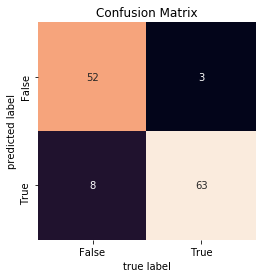

In [86]:
# Visualize the confusion matrix for the training set
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_mydata_df)

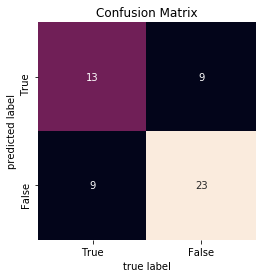

In [88]:
# Visualize the confusion matrix for the testing set
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_mydata_df)

In [90]:
# Calculate precision, recall, the F-measure, and AUC
test_mydata_df['nb_predict'] = naiveBayes.predict(np.stack(test_mydata_df['vect'], axis=0))
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['nb_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['nb_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['nb_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['nb_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.6666666666666666
Recall:  0.6666666666666666
F measure: 0.6666666666666666
AUC: 0.6548295454545454


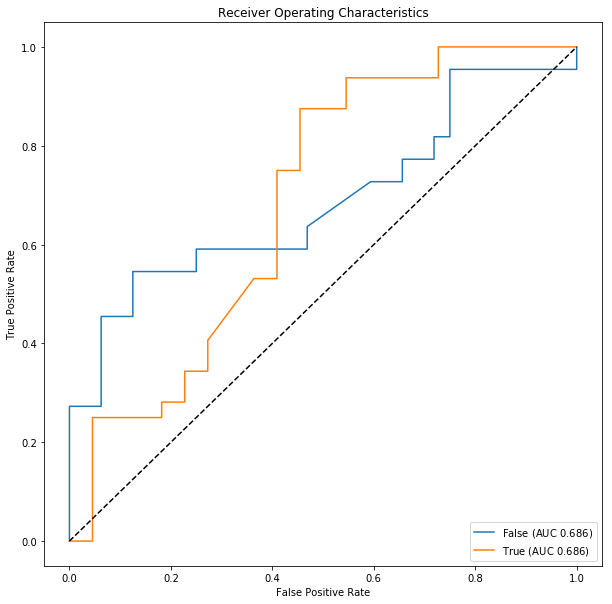

In [92]:
# perform an ROC visualization
lucem_illud_2020.plotMultiROC(naiveBayes, test_mydata_df)

In [93]:
# Exrapolate codes from these models to all uncoded data

# turn the uncoded dataset into a tf-idf matrix, store the vectors in df
TFVects_test = TFVectorizer.transform(data_uncoded['content'])
data_uncoded['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
# store the predicted labels
data_uncoded['nb_predict'] = naiveBayes.predict(np.stack(data_uncoded['vect'], axis=0))
data_uncoded.head()

,content,tokenized,normalized,vect,predict,nb_predict
181,I slept 11 hours last night from jet lag which...,"[I, slept, 11, hours, last, night, from, jet, ...","[sleep, hour, night, jet, lag, leave, feel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
182,I have not gone to the gym enough.,"[I, have, not, gone, to, the, gym, enough]","[go, gym]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
183,I have not been able to go to Wicker Park.,"[I, have, not, been, able, to, go, to, Wicker,...","[able, wicker, park]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
184,I forgot to go to a meeting yesterday.,"[I, forgot, to, go, to, a, meeting, yesterday]","[forget, meet, yesterday]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
185,I told myself that I would do well in my class...,"[I, told, myself, that, I, would, do, well, in...","[tell, class, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False


From the evaluation results, we can see that both the regression and naive bayes algorithms performs very bad in classifying the dataset. The testing result shows that both of the accuracy results are only a little above 50%. Also, precision, recall, the F-measure, and AUC are also very low, suggesting the bad performance. I think maybe because the task is to classify faulure or success events written by people, failure events could be describe in a very similar way as success events but with an extra word "didn't" or "failed", and make the algorithm very confused in classifying.  

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

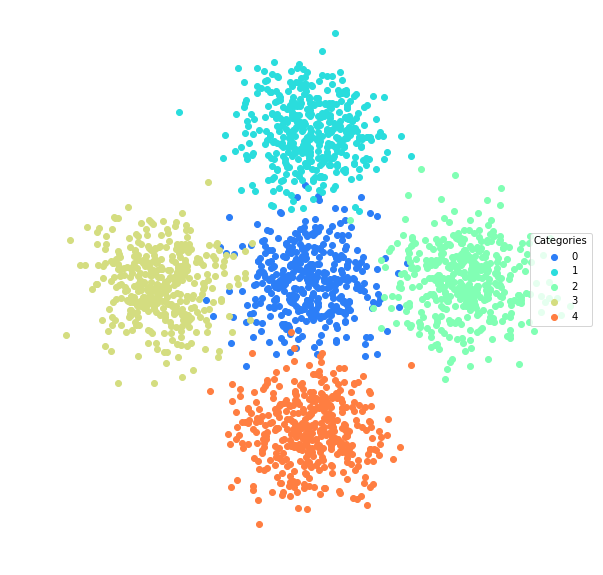

In [94]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [95]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

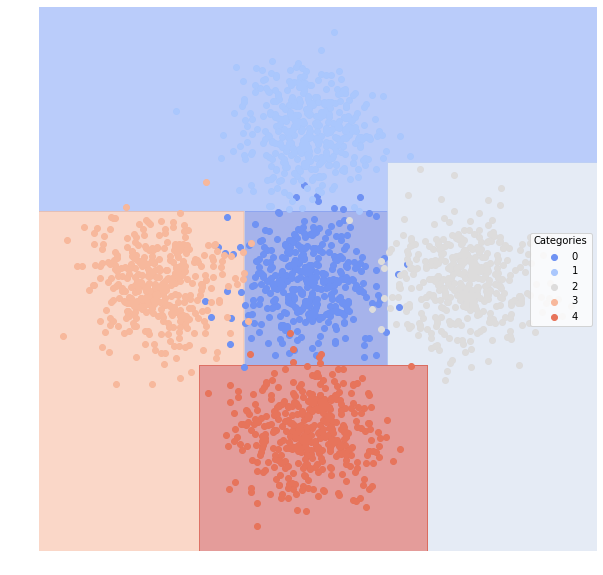

In [96]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [97]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.026,0.953750,0.948454,0.888577,0.920000
1,0.006,0.988239,0.989362,0.972533,0.978947
2,0.004,0.997531,0.979381,0.979381,1.000000
3,0.010,0.990570,0.967480,0.961417,0.991667
4,0.006,0.987669,0.988764,0.970792,0.977778


Lets look at accuracy:

In [98]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.974

What happens if we trim the tree?

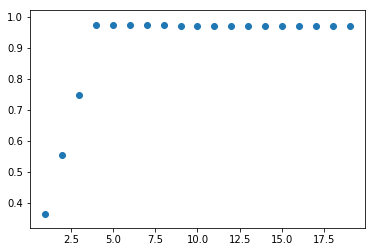

In [100]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [101]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [102]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

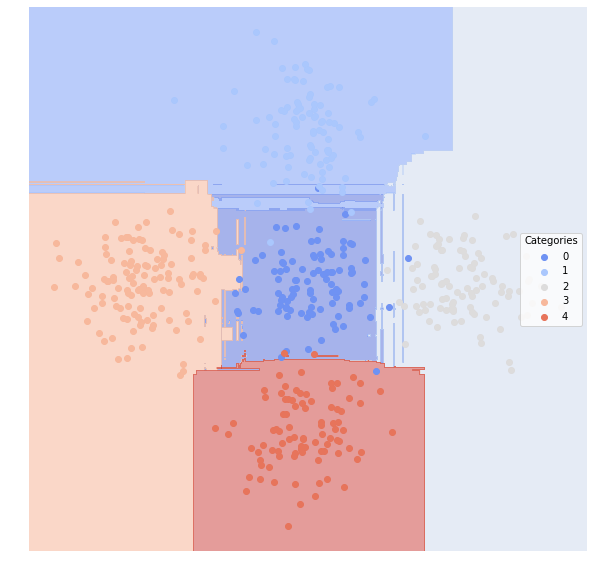

In [103]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [104]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.967500,0.940594,0.903564,0.950000
1,0.008,0.982976,0.989247,0.964008,0.968421
2,0.004,0.997531,0.979381,0.979381,1.000000
3,0.004,0.994518,0.991667,0.985403,0.991667
4,0.006,0.987669,0.988764,0.970792,0.977778


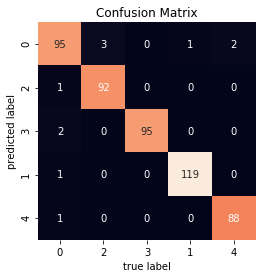

In [105]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

## Decision tree

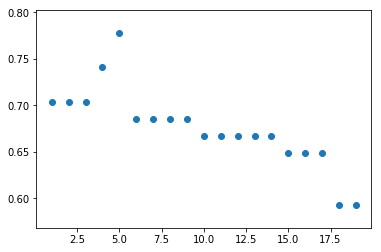

In [111]:
#Which max_depth is the best? 
depthvec2 = []
scorevec2 = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_mydata_df['vect'], axis =0), train_mydata_df['category'])
    score = sklearn.metrics.accuracy_score(test_mydata_df['category'], tree2.predict(np.stack(test_mydata_df['vect'], axis = 0)))
    depthvec2.append(i)
    scorevec2.append(score)
plt.scatter(depthvec2,scorevec2)
plt.show()

In [107]:
# fit with the best max-depth
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=5,random_state=0)
clf_tree.fit(np.stack(train_mydata_df['vect'], axis =0), train_mydata_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


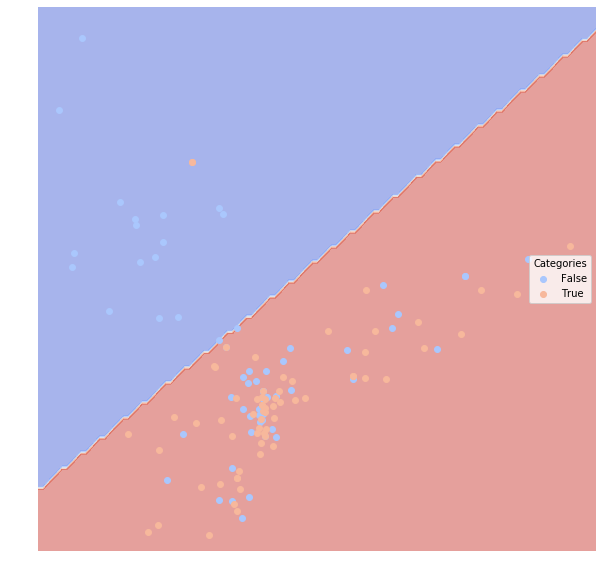

In [108]:
lucem_illud_2020.plotregions(clf_tree, train_mydata_df)

In [170]:
lucem_illud_2020.evaluateClassifier(clf_tree, train_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.206349,0.783333,1.000000,0.773016,0.566667
True,0.206349,0.783333,0.717391,0.717391,1.000000


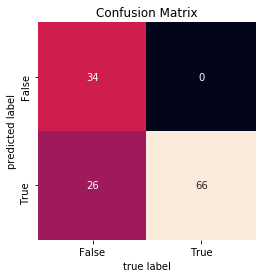

In [169]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, train_mydata_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


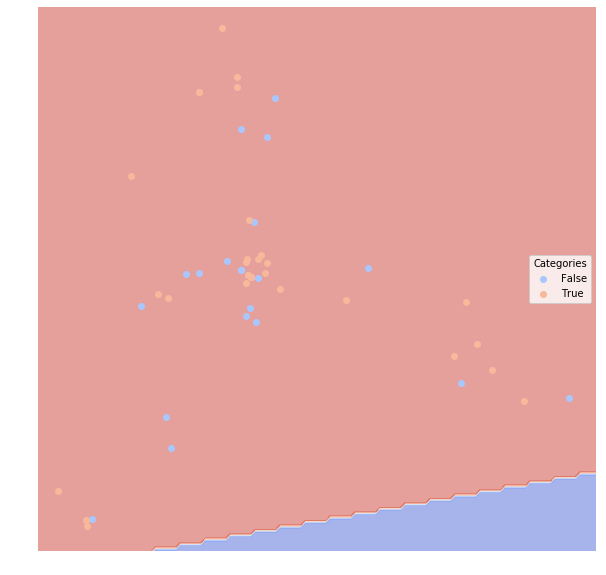

In [113]:
lucem_illud_2020.plotregions(clf_tree, test_mydata_df)

In [114]:
# Calculate precision, recall, the F-measure, and AUC
test_mydata_df['DT_predict'] = clf_tree.predict(np.stack(test_mydata_df['vect'], axis=0))
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['DT_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['DT_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['DT_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['DT_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.8108465608465608
Recall:  0.7777777777777778
F measure: 0.7601130542307013
AUC: 0.734375


In [171]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.222222,0.734375,0.916667,0.662037,0.50000
True,0.222222,0.734375,0.738095,0.733548,0.96875


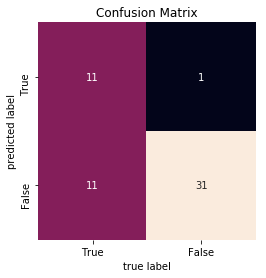

In [168]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_mydata_df)

In [115]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
data_uncoded['DT_predict'] = clf_tree.predict(np.stack(data_uncoded['vect'], axis=0))
data_uncoded.head()

,content,tokenized,normalized,vect,predict,nb_predict,DT_predict
181,I slept 11 hours last night from jet lag which...,"[I, slept, 11, hours, last, night, from, jet, ...","[sleep, hour, night, jet, lag, leave, feel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
182,I have not gone to the gym enough.,"[I, have, not, gone, to, the, gym, enough]","[go, gym]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
183,I have not been able to go to Wicker Park.,"[I, have, not, been, able, to, go, to, Wicker,...","[able, wicker, park]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
184,I forgot to go to a meeting yesterday.,"[I, forgot, to, go, to, a, meeting, yesterday]","[forget, meet, yesterday]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
185,I told myself that I would do well in my class...,"[I, told, myself, that, I, would, do, well, in...","[tell, class, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False


## Random Forest

In [116]:
# build an ensemble classifier by bagging trees into a random forest
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data
bag.fit(np.stack(train_mydata_df['vect'], axis =0), train_mydata_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


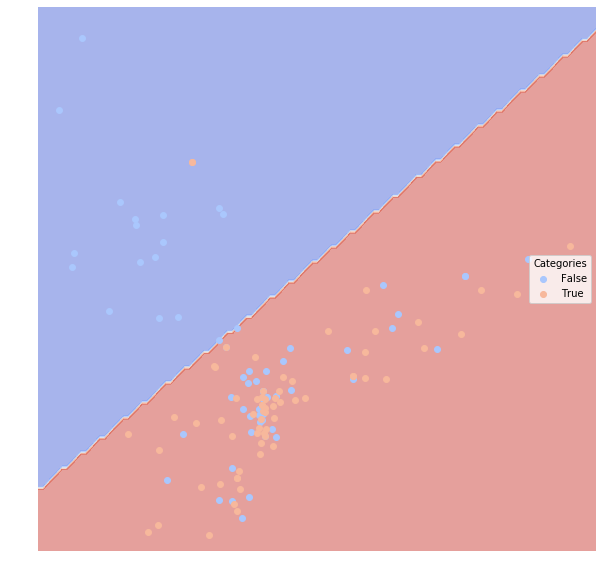

In [117]:
lucem_illud_2020.plotregions(bag, train_mydata_df)

In [165]:
lucem_illud_2020.evaluateClassifier(bag, train_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.111111,0.884091,0.979167,0.870188,0.783333
True,0.111111,0.884091,0.833333,0.828644,0.984848


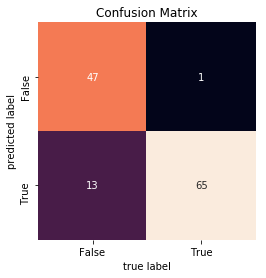

In [172]:
lucem_illud_2020.plotConfusionMatrix(bag, train_mydata_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


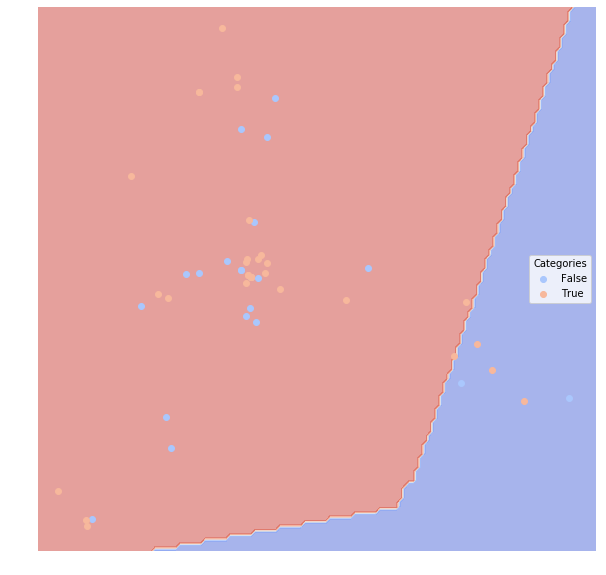

In [118]:
lucem_illud_2020.plotregions(bag, test_mydata_df)

In [119]:
# Calculate precision, recall, the F-measure, and AUC
test_mydata_df['RF_predict'] = bag.predict(np.stack(test_mydata_df['vect'], axis=0))
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['RF_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['RF_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['RF_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['RF_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.6800329741506212
Recall:  0.6851851851851852
F measure: 0.6764110822081838
AUC: 0.65625


In [127]:
lucem_illud_2020.evaluateClassifier(bag, test_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.314815,0.65625,0.647059,0.527233,0.5000
True,0.314815,0.65625,0.702703,0.682057,0.8125


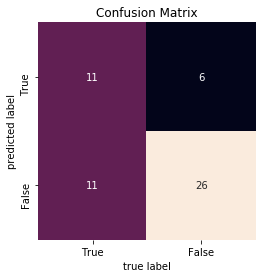

In [173]:
lucem_illud_2020.plotConfusionMatrix(bag, test_mydata_df)

In [120]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
data_uncoded['RF_predict'] = bag.predict(np.stack(data_uncoded['vect'], axis=0))
data_uncoded.head()

,content,tokenized,normalized,vect,predict,nb_predict,DT_predict,RF_predict
181,I slept 11 hours last night from jet lag which...,"[I, slept, 11, hours, last, night, from, jet, ...","[sleep, hour, night, jet, lag, leave, feel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True
182,I have not gone to the gym enough.,"[I, have, not, gone, to, the, gym, enough]","[go, gym]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True
183,I have not been able to go to Wicker Park.,"[I, have, not, been, able, to, go, to, Wicker,...","[able, wicker, park]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True
184,I forgot to go to a meeting yesterday.,"[I, forgot, to, go, to, a, meeting, yesterday]","[forget, meet, yesterday]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True
185,I told myself that I would do well in my class...,"[I, told, myself, that, I, would, do, well, in...","[tell, class, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False


From the evaluation results, the decision tree algorithm performs a bit better than random forest, but overall both of them perform very bad, the accracy of the classifications are very low. 

Ensemble methods combine multiple models in order to increase predictive performance, examples include boosting, bagging and stacking.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [121]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[be, sorry, read, commandment]"


Make a testing and training set:

In [122]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [123]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [124]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [125]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [126]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.161346,0.711618,1.000000,0.584583,0.423237
comp.graphics,0.225189,0.821493,0.546976,0.525155,0.921909
talk.religion.misc,0.157284,0.571683,0.681159,0.252672,0.158784
sci.space,0.164248,0.856208,0.649331,0.613554,0.902893


And lets look at the testing data

In [128]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.313953488372093


Let's produce another confusion matrix:

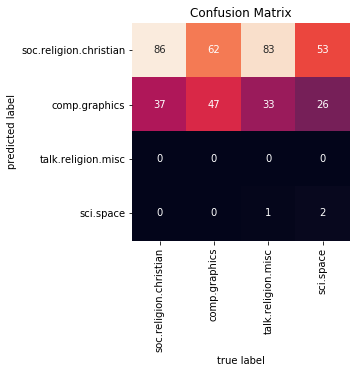

In [129]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [133]:
# fit the model
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf_knearest.fit(np.stack(train_mydata_df['vect'], axis = 0), train_mydata_df['category'])
test_mydata_df['knn_predict'] = clf_knearest.predict(np.stack(test_mydata_df['vect'], axis=0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


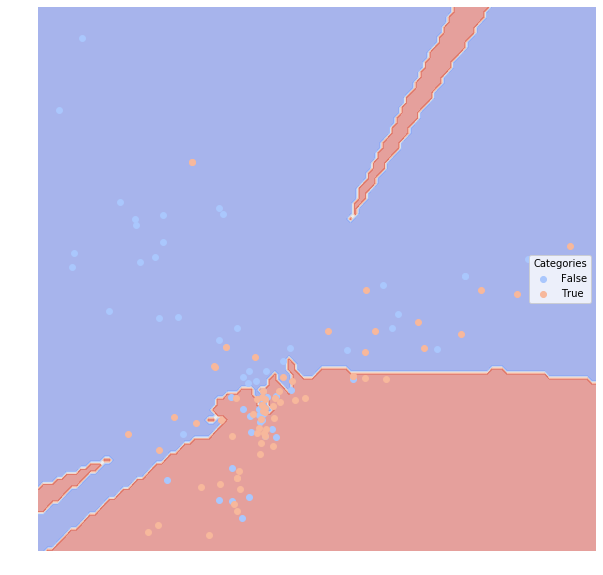

In [134]:
lucem_illud_2020.plotregions(clf_knearest, train_mydata_df)

In [164]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.238095,0.762879,0.734375,0.678435,0.783333
True,0.238095,0.762879,0.790323,0.721675,0.742424


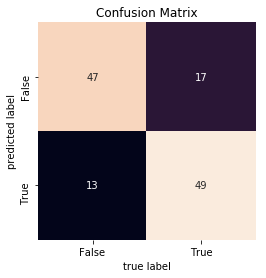

In [163]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, train_mydata_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


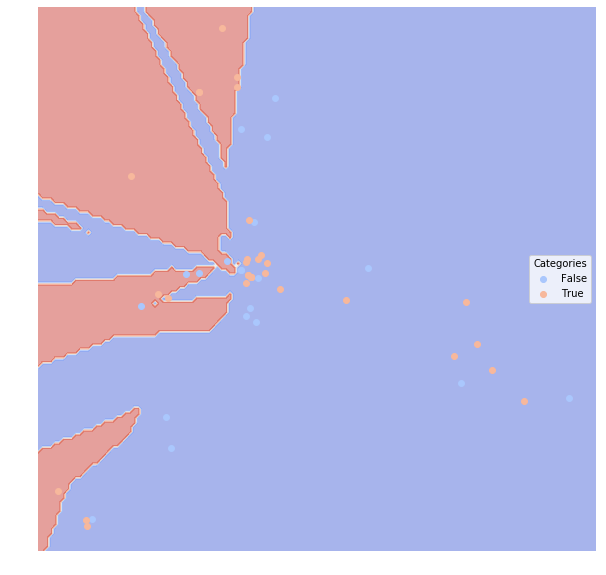

In [135]:
lucem_illud_2020.plotregions(clf_knearest, test_mydata_df)

In [136]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['knn_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['knn_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['knn_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['knn_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.6426536426536426
Recall:  0.6296296296296297
F measure: 0.632716049382716
AUC: 0.6306818181818182


In [138]:
lucem_illud_2020.evaluateClassifier(clf_knearest, test_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.37037,0.630682,0.538462,0.490805,0.636364
True,0.37037,0.630682,0.714286,0.668651,0.625000


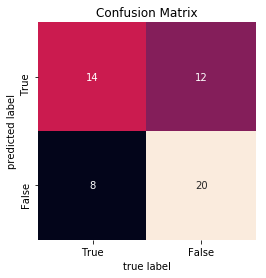

In [143]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_mydata_df)

In [137]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
data_uncoded['KNN_predict'] = bag.predict(np.stack(data_uncoded['vect'], axis=0))
data_uncoded.head()

,content,tokenized,normalized,vect,predict,nb_predict,DT_predict,RF_predict,KNN_predict
181,I slept 11 hours last night from jet lag which...,"[I, slept, 11, hours, last, night, from, jet, ...","[sleep, hour, night, jet, lag, leave, feel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True,True
182,I have not gone to the gym enough.,"[I, have, not, gone, to, the, gym, enough]","[go, gym]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True,True
183,I have not been able to go to Wicker Park.,"[I, have, not, been, able, to, go, to, Wicker,...","[able, wicker, park]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True,True
184,I forgot to go to a meeting yesterday.,"[I, forgot, to, go, to, a, meeting, yesterday]","[forget, meet, yesterday]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True,True
185,I told myself that I would do well in my class...,"[I, told, myself, that, I, would, do, well, in...","[tell, class, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,False


K-nearest neighbor algorithm also performs not very good in this dataset, the indicators of the evaluation looks not good.

k-nearest neighbor approach and k-means clustering: these two algorithms are foundamentally similar, while K-nearest neighbor is a supervised learning method that serves to classify new, unlabelled data based on a model trained on labelled data. But K-means clustering is an unsupervised learning method used to gradually learn how to cluster the unlabelled points into group.

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [139]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [140]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [141]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [142]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [144]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.015674,0.980038,0.958904,0.938537,0.972222
Bad Roommates: Tales of Irritation,0.012539,0.978453,0.986667,0.957629,0.961039
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.992040,0.988372,0.980014,0.988372
Tales From Tech Support,0.009404,0.989792,0.976471,0.967981,0.988095


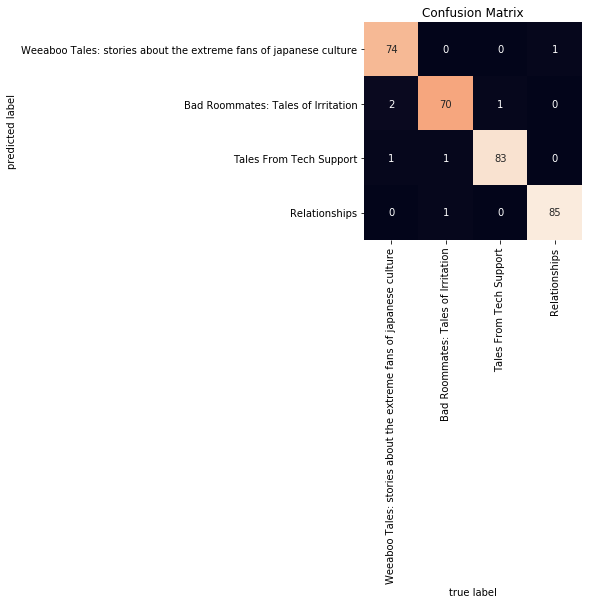

In [145]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

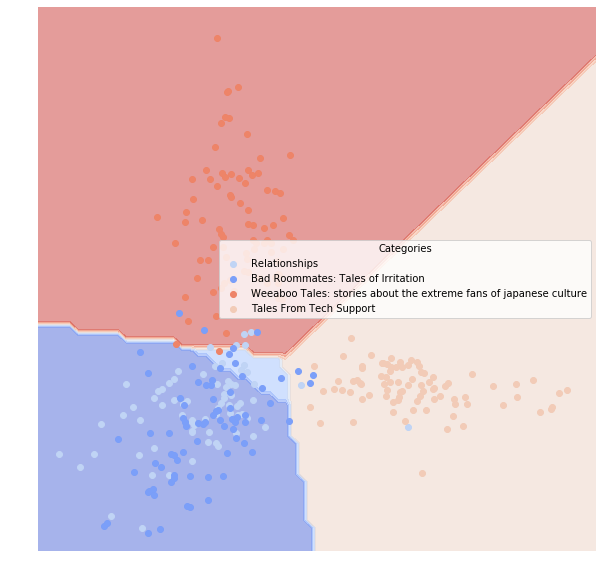

In [146]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [147]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [148]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.031348,0.945316,0.955882,0.884893,0.902778
Bad Roommates: Tales of Irritation,0.028213,0.963695,0.935897,0.899819,0.948052
Weeaboo Tales: stories about the extreme fans of japanese culture,0.015674,0.985602,0.955056,0.947086,0.988372
Tales From Tech Support,0.006270,0.991920,0.988095,0.979467,0.988095


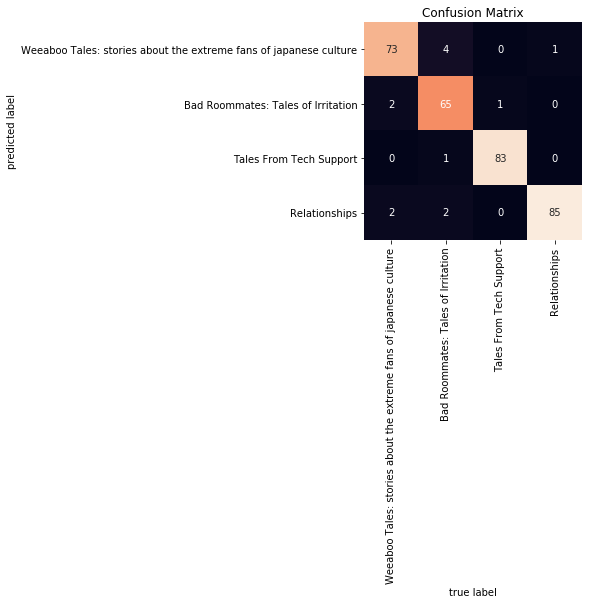

In [149]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

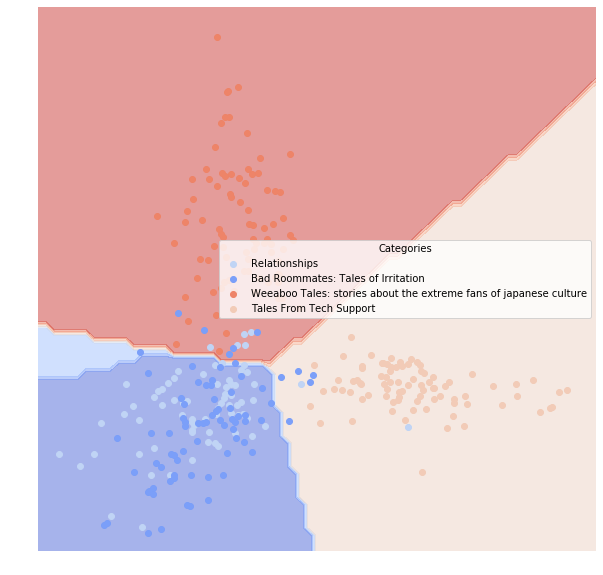

In [150]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [152]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_mydata_df['vect'], axis=0), train_mydata_df['category'])

C:\Users\74068\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [158]:
# train data
lucem_illud_2020.evaluateClassifier(clf_nn, train_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.02381,0.976515,0.967213,0.959029,0.983333
True,0.02381,0.976515,0.984615,0.970652,0.969697


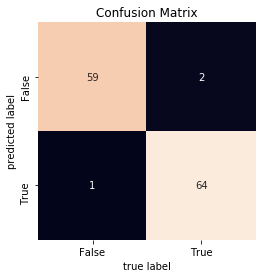

In [159]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, train_mydata_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


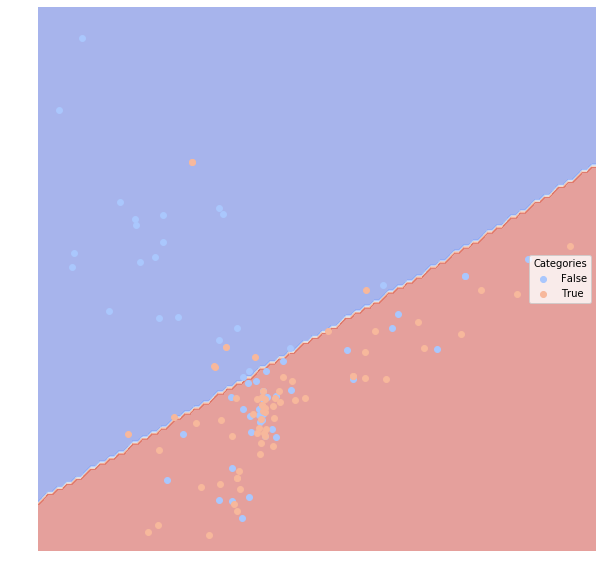

In [161]:
lucem_illud_2020.plotregions(clf_nn, train_mydata_df)

In [153]:
# test data
# Calculate precision, recall, the F-measure, and AUC
test_mydata_df['nn_predict'] = clf_nn.predict(np.stack(test_mydata_df['vect'], axis=0))
print("Precision:", sklearn.metrics.precision_score(test_mydata_df['category'], test_mydata_df['nn_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_mydata_df['category'], test_mydata_df['nn_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_mydata_df['category'], test_mydata_df['nn_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_mydata_df['category'], test_mydata_df['nn_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.5917014759120023
Recall:  0.5370370370370371
F measure: 0.5308259756144174
AUC: 0.5667613636363636


In [155]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_mydata_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.462963,0.566761,0.457143,0.443579,0.727273
True,0.462963,0.566761,0.684211,0.629812,0.406250


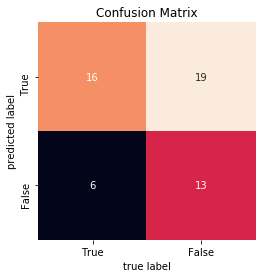

In [156]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_mydata_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


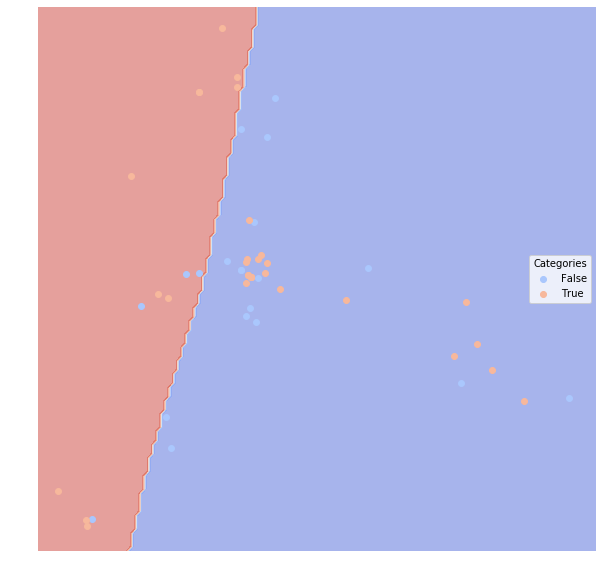

In [157]:
lucem_illud_2020.plotregions(clf_nn, test_mydata_df)

The results of neural network classification also looks not satisfying, the error rate is very high, the precision score is low. It performs much better on training data then the test data. Compare to the above other algothrithms, neural network actually performs the worst, this suprising since neural network is usually regarded as the most accurate. The case might  because the dataset itself is hard for the classification algorithms to classify well, since the evaluation results of all the slgorithms are not good. 